In [5]:
from pandas.io.html import read_html
import matplotlib.pyplot as plt
import pandas as pd

### scrap data from wiki

In [12]:

perspolis_pages='https://en.wikipedia.org/wiki/List_of_Persepolis_F.C._seasons'
perspolis_tabel = read_html(perspolis_pages)
# #######################
esteghlal_pages='https://en.wikipedia.org/wiki/List_of_Esteghlal_F.C._seasons'
esteghlal_tabel = read_html(esteghlal_pages)
# #######################
sepahan_pages='https://en.wikipedia.org/wiki/List_of_Sepahan_F.C._seasons'
sepahan_tabel = read_html(sepahan_pages)


### prepare data

In [13]:
sepahan = sepahan_tabel[0][28:45]
sepahan = sepahan.reset_index()
del sepahan['index']
esteghlal = esteghlal_tabel[2][62:79]
esteghlal = esteghlal.reset_index()
del esteghlal['index']
perspolis = perspolis_tabel[0][37:54]
perspolis = perspolis.reset_index()

perspolisPer = pd.to_numeric(perspolis['League']['W'])/ (pd.to_numeric(perspolis['League']['D'])+pd.to_numeric(perspolis['League']['W']) + pd.to_numeric(perspolis['League']['L']))
esteghlalPer = pd.to_numeric(esteghlal['League']['W']) / (pd.to_numeric(esteghlal['League']['D'])+pd.to_numeric(esteghlal['League']['W']) + pd.to_numeric(esteghlal['League']['L']))
sepahanPer = pd.to_numeric(sepahan['League']['W']) / (pd.to_numeric(sepahan['League']['D'])+pd.to_numeric(sepahan['League']['W']) + pd.to_numeric(sepahan['League']['L']))
df = pd.DataFrame({
    'Season': perspolis['Season']['Season'],
    'Win_perspolis': perspolisPer,
    'Win_esteghlal': esteghlalPer,
    'Win_sepahan': sepahanPer
})
df

,Season,Win_perspolis,Win_esteghlal,Win_sepahan
0,2001–02,0.500000,0.500000,0.269231
1,2002–03,0.423077,0.307692,0.615385
2,2003–04,0.384615,0.538462,0.423077
3,2004–05,0.533333,0.533333,0.233333
4,2005–06,0.300000,0.533333,0.400000
5,2006–07,0.466667,0.466667,0.466667
6,2007–08,0.529412,0.323529,0.500000
7,2008–09,0.441176,0.558824,0.411765
8,2009–10,0.382353,0.470588,0.558824
9,2010–11,0.500000,0.529412,0.529412


### plot data

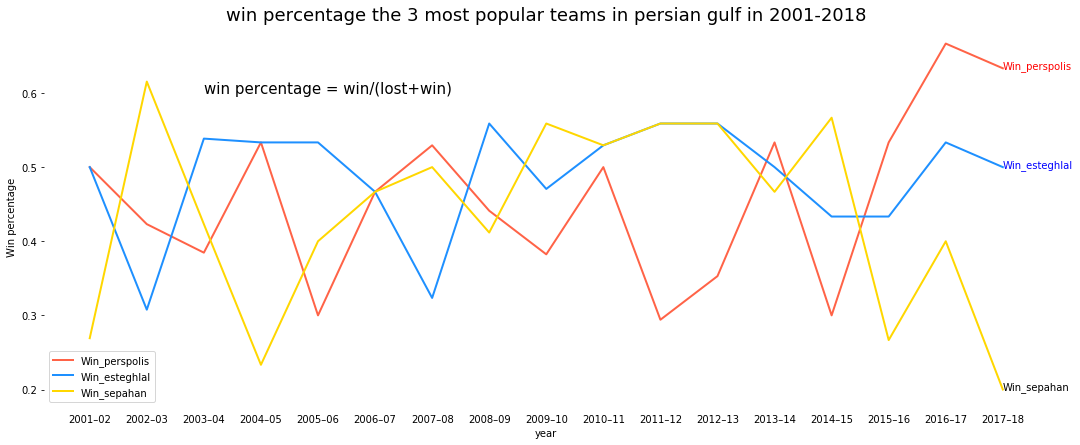

In [14]:
import numpy as np
# gold dodgerblue darkred
plt.figure(figsize=(18,7))
plt.plot(df['Season'], df['Win_perspolis'],lw=2,  color='tomato',  label='Win_perspolis')
plt.text(df['Season'][16], df['Win_perspolis'][16],'Win_perspolis', color='red')

plt.plot(df['Season'], df['Win_esteghlal'], lw=2, color='dodgerblue', label='Win_esteghlal')
plt.text(df['Season'][16], df['Win_esteghlal'][16], 'Win_esteghlal', color='blue')

plt.plot(df['Season'], df['Win_sepahan'], lw=2, color='gold', label='Win_sepahan')
plt.text(df['Season'][16], df['Win_sepahan'][16], 'Win_sepahan', color='black')

plt.legend()

plt.xlabel('year')
plt.ylabel('Win percentage')

font = {'size'   : 15}
plt.text(df['Season'][2], .6 , 'win percentage = win/(lost+win)', fontdict=font)
# plt.yticks([6,13,20])
plt.title('win percentage the 3 most popular teams in persian gulf in 2001-2018', fontsize=18)
plt.tick_params(top=False, bottom=False, left=True, right=False, labelleft=True, labelbottom=True)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()
            


In [15]:

iranian_pages = 'https://fa.wikipedia.org/wiki/%D9%84%DB%8C%DA%AF_%D8%A8%D8%B1%D8%AA%D8%B1_%D8%AE%D9%84%DB%8C%D8%AC_%D9%81%D8%A7%D8%B1%D8%B3'
english_pages = 'https://en.wikipedia.org/wiki/Persian_Gulf_Pro_League'

leageTable_pl = read_html(iranian_pages, attrs={"class":"wikitable"})
leageTable_el = read_html(english_pages, attrs={"class":"wikitable"})


In [16]:
leageTable_el[1]

,Club,Winners,Runners-up,Winning seasons
0,Persepolis,12,9,"1971–72, 1973–74, 1975–76, 1995–96, 1996–97, 1..."
1,Esteghlal,8,9,"1970–71, 1974–75, 1989–90, 1997–98, 2000–01, 2..."
2,Pas,5,5,"1976–77, 1977–78, 1991–92, 1992–93, 2003–04"
3,Sepahan,5,2,"2002–03, 2009–10, 2010–11, 2011–12, 2014–15"
4,Saipa,3,0,"1993–94, 1994–95, 2006–07"
5,Foolad,2,0,"2004–05, 2013–14"
6,Esteghlal Khuzestan,1,0,2015–16


In [17]:
del leageTable_el[1]['Runners-up'], leageTable_el[1]['Winning seasons']
leageTable_el[1]


,Club,Winners
0,Persepolis,12
1,Esteghlal,8
2,Pas,5
3,Sepahan,5
4,Saipa,3
5,Foolad,2
6,Esteghlal Khuzestan,1


/home/omid/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


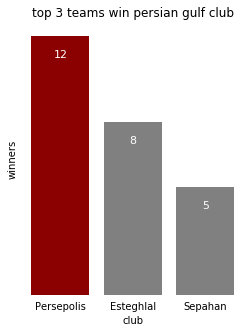

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,5))
bars = plt.bar(['Persepolis', 'Esteghlal', 'Sepahan'], [12, 8, 5], color = [ 'darkred', 'gray', 'gray'])
plt.ylabel('winners')
plt.xlabel('club')
plt.title('top 3 teams win persian gulf club')
# remove all the ticks
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 1, str(int(bar.get_height())) , 
                 ha='center', color='W', fontsize=11)
# plt.show()
